# Chebyshev Polynomial Approximation for ReLU Function

In [1]:
import pandas as pd

def format_ndarray_csv(x, arr1, arr2, arr3, precision=3):
    data = {'a': np.round(x, precision), 'b': np.round(arr1, precision), 'c': np.round(arr2, precision), 'd': np.round(arr3, precision)}
    df = pd.DataFrame(data)
    df.to_csv('./temp.csv', index=False)

[ 3.18322977e-01  5.00000000e-01  2.12180401e-01  2.28020571e-17
 -4.24151013e-02  4.29077153e-17  1.81628741e-02]
0.31832298 + 0.5·T₁(x) + 0.2121804·T₂(x) + (2.28020571e-17)·T₃(x) -
0.0424151·T₄(x) + (4.29077153e-17)·T₅(x) + 0.01816287·T₆(x)
0.0455646 + 0.5·x + 1.09061335·x² + 0.0·x³ - 1.21113877·x⁴ + 0.0·x⁵ +
0.58121197·x⁶
0.227823 + 0.5·x + 0.21812267·x² + 0.0·x³ - 0.00968911·x⁴ + 0.0·x⁵ +
0.00018599·x⁶


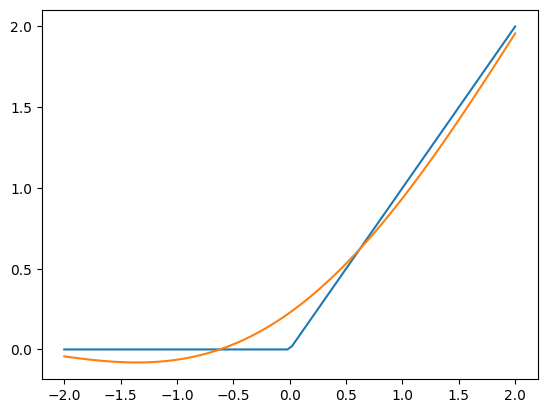

In [ ]:
# Simulate ReLU function directly

import numpy as np
from numpy.polynomial.chebyshev import chebval, chebfit
import matplotlib.pyplot as plt

# Define the ReLU function for [-1, 1]
def relu(x):
    return np.maximum(0, x)

# Generate points (Chebyshev nodes) in [-1, 1]
n = 100  # Number of points for numerical integration
x = np.cos((2 * np.arange(1, n + 1) - 1) / (2 * n) * np.pi)

# Evaluate the ReLU function at these points
y = relu(x)

# Fit Chebyshev polynomial to ReLU values
N = 6  # Degree of the Chebyshev polynomial approximation
coeffs = chebfit(x, y, N)

# Approximate ReLU using the Chebyshev polynomial
def relu_approx(x):
    return chebval(x, coeffs)

print(coeffs)

T = np.polynomial.Chebyshev(coeffs)
print(T)

poly = T.convert(kind=np.polynomial.Polynomial)
poly.coef[np.abs(poly.coef) < 1e-5] = 0
print(poly)

# Expand the polynomial to the interval
poly.coef /= np.power(5, np.arange(poly.coef.size))
poly.coef *= 5
print(poly)

# Plot the ReLU function and its Chebyshev approximation
plot_x = np.linspace(-2, 2, 100)
plot_y = relu(plot_x)
plot_y_approx = poly(plot_x)

xx, arr1, arr2 = plot_x, plot_y, plot_y_approx

plt.plot(plot_x, plot_y, label='ReLU')
plt.plot(plot_x, plot_y_approx, label='Chebyshev approximation')

# print(poly)

[ 5.00000000e-01  6.36519704e-01 -1.17995393e-16 -2.11906693e-01
 -9.06395079e-17  1.26825149e-01  1.79490323e-16]
0.5 + 0.6365197·T₁(x) - (1.17995393e-16)·T₂(x) - 0.21190669·T₃(x) -
(9.06395079e-17)·T₄(x) + 0.12682515·T₅(x) + (1.79490323e-16)·T₆(x)
0.5 + 1.90636553·x + (3.7199511e-15)·x² - 3.38412976·x³ -
(9.34065158e-15)·x⁴ + 2.02920239·x⁵ + (5.74369035e-15)·x⁶
0.3 + 0.5·x + 0.19063655·x² + 0.0·x³ - 0.00676826·x⁴ + 0.0·x⁵ +
0.00010822·x⁶


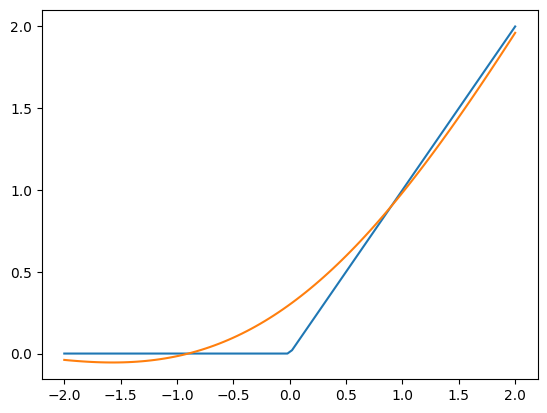

In [ ]:
# Simulate its derivative function and manually integrate its Chebyshev approximation

import numpy as np
from numpy.polynomial.chebyshev import chebval, chebfit
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-100*x))

# Generate points (Chebyshev nodes) in [-1, 1]
n = 100  # Number of points for numerical integration
x = np.cos((2 * np.arange(1, n + 1) - 1) / (2 * n) * np.pi)

# Evaluate the ReLU function at these points
y = sigmoid(x)

# Fit Chebyshev polynomial to ReLU values
N = 6  # Degree of the Chebyshev polynomial approximation
coeffs = chebfit(x, y, N)

# Approximate ReLU using the Chebyshev polynomial
def sigmoid_approx(x):
    return chebval(x, coeffs)

print(coeffs)

T = np.polynomial.Chebyshev(coeffs)
print(T)

poly = T.convert(kind=np.polynomial.Polynomial)
print(poly)

poly_coeff = poly.coef / np.arange(1, len(poly.coef) + 1)
poly_coeff = np.insert(poly_coeff, 0, 0.06)

poly = np.polynomial.Polynomial(poly_coeff[0:7])
poly.coef[np.abs(poly.coef) < 1e-5] = 0

poly.coef /= np.power(5, np.arange(poly.coef.size))
poly.coef *= 5
print(poly)

plot_x = np.linspace(-2, 2, 100)
plot_y = relu(plot_x)
plot_y_approx = poly(plot_x)

arr3 = plot_y_approx

# format_ndarray_csv(xx, arr1, arr2, arr3) # Save to temp.csv

plt.plot(plot_x, plot_y, label='ReLU')
plt.plot(plot_x, plot_y_approx, label='Chebyshev approximation')